<h1 style="color:Teal>Diabetes prediction</h1>

![Diabetes Prediction Model](diabetes.jpg)

# Diabetes Prediction Model using Machine Learning

## About the Dataset
The **Diabetes Prediction dataset** is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as:
- Age  
- Gender  
- Body Mass Index (BMI)  
- Hypertension  
- Heart Disease  
- Smoking History  
- HbA1c Level  
- Blood Glucose Level  

This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. It can be particularly useful for healthcare professionals in identifying patients at risk of developing diabetes and for developing personalized treatment plans. Additionally, this dataset provides a valuable resource for researchers exploring the relationships between various medical and demographic factors and the likelihood of developing diabetes.

### Dataset Source:
- **[Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)**

## Model Objective:
This notebook demonstrates the implementation of machine learning models for predicting diabetes using various features from the dataset.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No_Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.shape

(100000, 9)

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.shape

(96142, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96142 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96142 non-null  object 
 1   age                  96142 non-null  float64
 2   hypertension         96142 non-null  int64  
 3   heart_disease        96142 non-null  int64  
 4   smoking_history      96142 non-null  object 
 5   bmi                  96142 non-null  float64
 6   HbA1c_level          96142 non-null  float64
 7   blood_glucose_level  96142 non-null  int64  
 8   diabetes             96142 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


<h3 style="color:orange"> input and output features</h3>

In [9]:
x=df.iloc[:,:-1]
y=df['diabetes']

In [10]:
df['diabetes'].value_counts()

0    87660
1     8482
Name: diabetes, dtype: int64

### Encoding the features

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc_gender=LabelEncoder()
enc_smoking=LabelEncoder()

In [13]:
x['gender']=enc_gender.fit_transform(x['gender'])
x['smoking_history']=enc_smoking.fit_transform(x['smoking_history'])

In [14]:
x.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


### Visualization

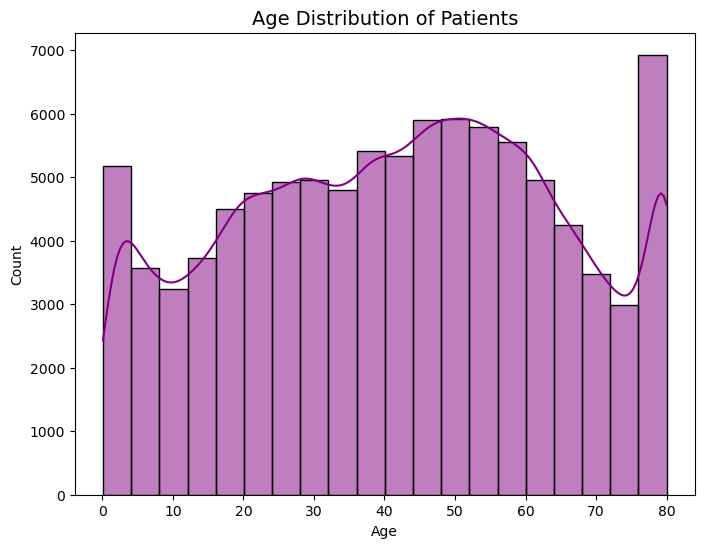

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

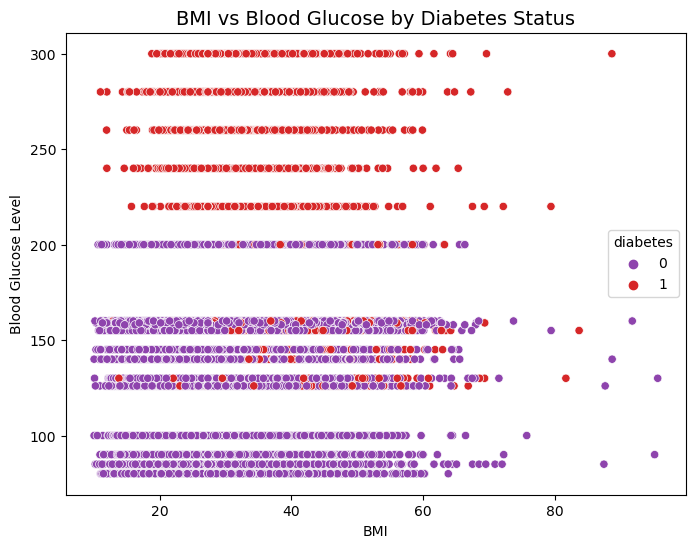

In [16]:
dark_palette = ["#8E44AD", "#d62728"]
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', data=df, palette=dark_palette)
plt.title('BMI vs Blood Glucose by Diabetes Status', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

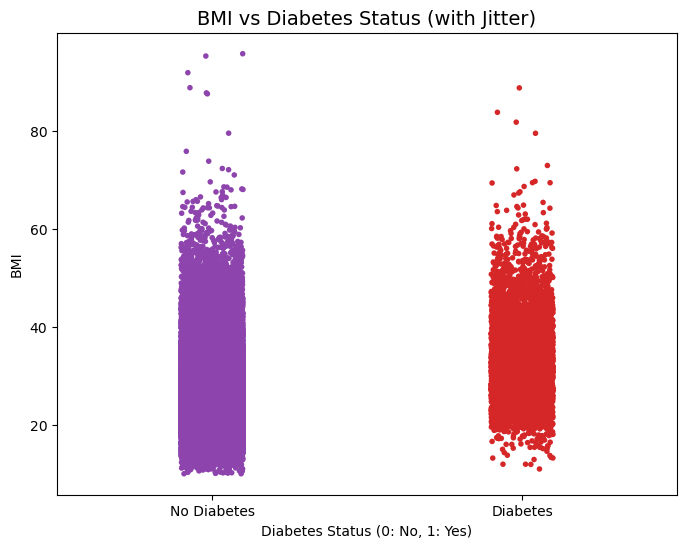

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dark palette
dark_palette = ["#8E44AD", "#d62728"]

# Create a scatter plot with jitter
plt.figure(figsize=(8, 6))
sns.stripplot(x='diabetes', y='bmi', data=df, palette=dark_palette, jitter=True, size=4)
plt.title('BMI vs Diabetes Status (with Jitter)', fontsize=14)
plt.xlabel('Diabetes Status (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

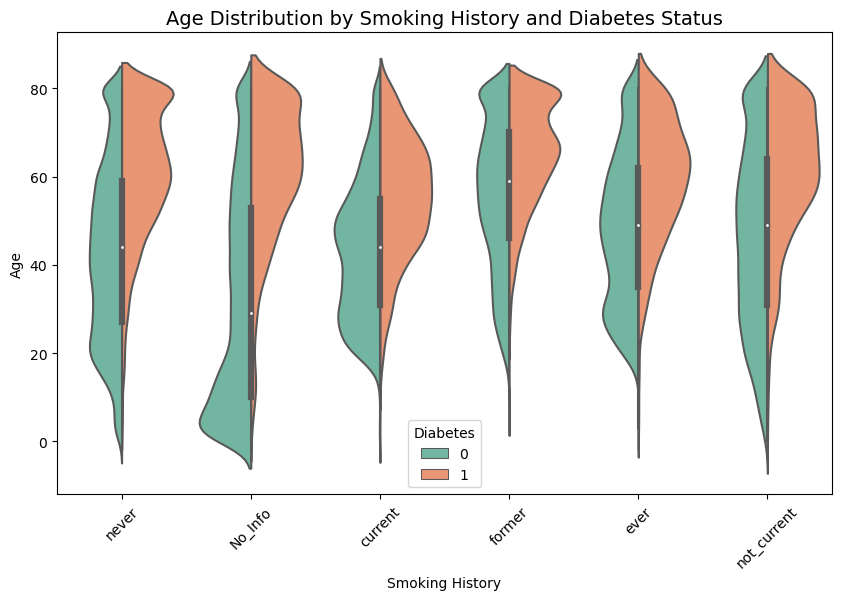

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x='smoking_history', y='age', hue='diabetes', data=df, split=True, palette='Set2')
plt.title('Age Distribution by Smoking History and Diabetes Status', fontsize=14)
plt.xlabel('Smoking History')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Diabetes')
plt.show()

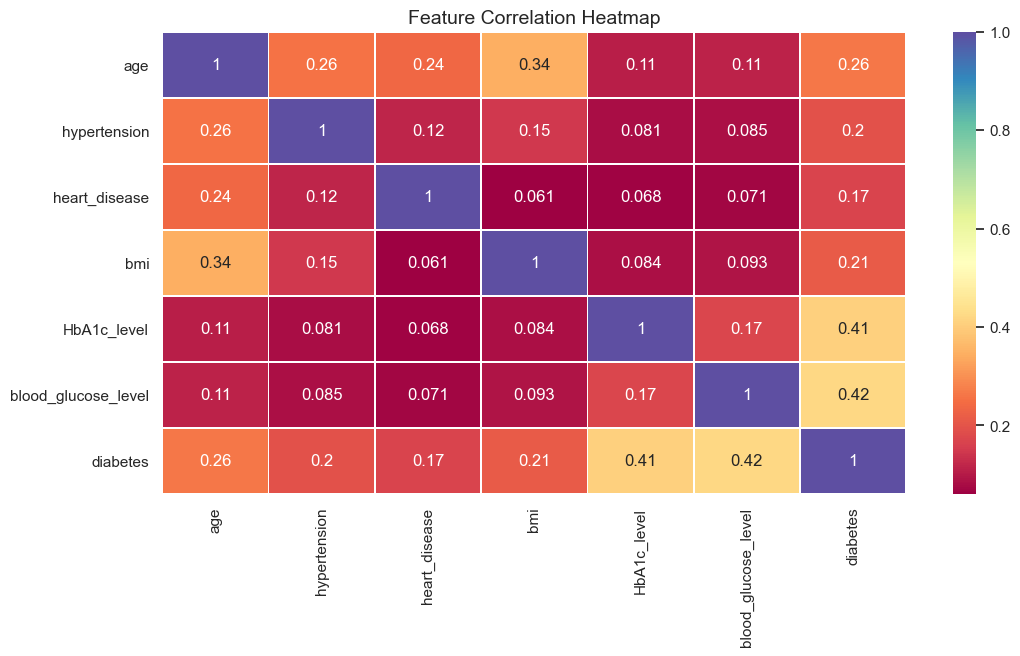

In [19]:
sns.set(style="whitegrid")

# 1. Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

### Separating the training and testing data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=49)

### Preparing the Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.03963506804739392,
 class_weight= 'balanced',
 criterion= 'entropy',
 max_depth= 5,
 max_features= 'log2',
 max_leaf_nodes= 49,
 max_samples= 0.9625125492354801,
 min_impurity_decrease= 0.06905277038677497,
 min_samples_leaf= 4,
 min_samples_split= 6,
 min_weight_fraction_leaf= 0.0726891879458632,
 n_estimators= 170,
 n_jobs= -1,
 oob_score= True,
 random_state= 42,
 verbose= 0,
 warm_start= True)

In [26]:
rf.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.03963506804739392, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=49, max_samples=0.9625125492354801,
                       min_impurity_decrease=0.06905277038677497,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0726891879458632,
                       n_estimators=170, n_jobs=-1, oob_score=True,
                       random_state=42, warm_start=True)

In [28]:
from sklearn.metrics import confusion_matrix
train_score_rf = rf.score(x_train, y_train) * 100
test_score_rf = rf.score(x_test, y_test) * 100

print(f"rf Training Accuracy: {train_score_rf:.2f}%")
print(f"rf Test Accuracy: {test_score_rf:.2f}%")

# Make predictions with XGBoost
y_pred_rf = rf.predict(x_test)

# Evaluation metrics for XGBoost
print("rf Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\rf Classification Report:")
print(classification_report(y_test, y_pred_rf))

rf Training Accuracy: 97.09%
rf Test Accuracy: 97.04%
rf Confusion Matrix:
[[26316     0]
 [  853  1674]]
f Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26316
           1       1.00      0.66      0.80      2527

    accuracy                           0.97     28843
   macro avg       0.98      0.83      0.89     28843
weighted avg       0.97      0.97      0.97     28843



In [29]:
import joblib

In [185]:
# Export the trained model
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [31]:
from scipy.stats import randint, uniform

param_distributions = {
    "n_estimators": randint(30,150),  # Random integers between 100 and 300
    "criterion": ["gini", "entropy", "log_loss"],  # Choose between Gini and Entropy
    "max_depth": randint(1, 26),  # Random depth between 1 and 25
    "min_samples_split": randint(2, 16),  # Random values between 2 and 15
    "min_samples_leaf": randint(1, 19),  # Random values between 1 and 15
    "min_weight_fraction_leaf": uniform(0.0, 0.1),  # Continuous values between 0.0 and 0.1
    "max_features": ["sqrt", "log2", None],  # Choose among 'sqrt', 'log2', or None
    "max_leaf_nodes": randint(5, 50),  # Random values between 10 and 50
    "min_impurity_decrease": uniform(0.0, 0.1),  # Continuous values between 0.0 and 0.1
    "bootstrap": [True, False],  # Choose between True or False
    "oob_score": [True, False],  # Choose between True or False
    "n_jobs": [None, -1],  # None or use all cores
    "random_state": [None, 42],  # Use fixed seed or None
    "verbose": [0, 1],  # Choose verbosity level
    "warm_start": [False, True],  # Use warm start or not
    "class_weight": [None, "balanced"],  # Class weight options
    "ccp_alpha": uniform(0.0, 0.1),  # Continuous values between 0.0 and 0.1
    "max_samples": uniform(0.8, 0.2),  # Continuous values between 0.8 and 1.0
    "monotonic_cst": [None],  # Keep as None for constraints
}

In [32]:
# gd=GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
# gd.fit(x_train, y_train)

In [81]:
rd=RandomizedSearchCV(estimator=rf,
    param_distributions=param_distributions,
    n_iter=40)

In [83]:
rd.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  73 out 

RandomizedSearchCV(estimator=RandomForestClassifier(ccp_alpha=0.03963506804739392,
                                                    class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=6,
                                                    max_features='log2',
                                                    max_leaf_nodes=49,
                                                    max_samples=0.9625125492354801,
                                                    min_impurity_decrease=0.06905277038677497,
                                                    min_samples_leaf=4,
                                                    min_samples_split=6,
                                                    min_weight_fraction_leaf=0.0726891879458632,
                                                    n_estimators=133,
                                                    o...
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E0F86BEDE0>,
                                        'min_weight_fraction_leaf': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E0F8EAED20>,
                                        'monotonic_cst': [None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E0F690EAE0>,
                                        'n_jobs': [None, -1],
                                        'oob_score': [True, False],
                                        'random_state': [None, 42],
                                        'verbose': [0, 1],
                                        'warm_start': [False, True]})

In [85]:
rd.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.014399451740957026,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 23,
 'max_features': None,
 'max_leaf_nodes': 37,
 'max_samples': 0.916768870201133,
 'min_impurity_decrease': 0.019936050810747497,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.004439509839544398,
 'monotonic_cst': None,
 'n_estimators': 142,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [87]:
rd.best_score_*100

89.10045445951431